<h2>What is Employee Attrition?</h2>
According to Jobzology, “Staff attrition refers to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. With attrition, an employer will not fill the vacancy left by the former employee.”

<h2>Reasons to Predict Employee Attrition</h2>
With machine learning, HR managers will be able to foresee vacant positions, team budget needs, what employee benefits they can improve to keep employees happy, what departments are the most and least likely to stay at a position for a length of time, and more. As a business, you can predict questions like,

What causes employee churn?
Why do we lose valuable employees?
When will an employee most likely leave the company?
> Predicting these things would save a lot of money in the long run. According to the Center of American Progress, “For positions that earn between $30,000 and $50,000 per year, the cost of replacement was found to be 20% of annual salary. For executives earning high salaries, the cost of replacement was found to be 213% of annual salary. (Boushey & Glynn, 2012). For example, an executive who earns $100,000 would cost $213,000 to replace.”
With the increasing economic burden on companies due to the chaos created by the COVID-19 Pandemic, it is necessary for the companies to take strategic steps in order to push back the financial distress they could go through. This means reducing the expenditure and one of the ways to do this is by cutting down on the workforce. Cutting down employees or reducing an employee's salary is a tough decision to take. These decisions have a powerful impact on the lives of the people it affects and therefore needs to be taken with utmost care and consideration. Therefore it is necessary to identify the employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

<h2>About Human Resource Analytics</h2>
The Human Resources department is in charge of taking care of employee’s well being and ensuring they are happy with their position. With machine learning you can actually predict employee attrition to see what causes a valuable employee to leave or stay with a company. This is perfect for HR managers planning their hiring and auditing employee experience. 

<h2>About the Dataset</h2>
This is a fictional data set created by IBM data scientists to uncover the factors that lead to employee attrition.
<h2>Skills covered</h2>
Pandas,Matplotlib, Seaborn, Data Visualization, machine learning, RandomForestClassifier, Confusion Matrix, Threshold Tuning

<h2> Goal: Building a machine learning model to predict employee attrition using Python and the scikit-learn library </h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition-clean.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [6]:
# Converting Object columns to numeric data
# defining function to convert object columns to numeric data using pd.factorize()

def convert_object_to_numeric(col):
    if col.dtype == 'object':
        col, _ = pd.factorize(col)
    return col

# loop over columns in data frame and apply function
for col in df.columns:
    df[col] = convert_object_to_numeric(df[col])

# print updated data frame
print(df.dtypes)

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

In [27]:
# select the features and target variable
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the classifier to the training data
rfc.fit(X_train, y_train)
# make predictions on the test set
y_pred = rfc.predict(X_test)

# generate a classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.12      0.20        69
           1       0.86      0.99      0.92       372

    accuracy                           0.86       441
   macro avg       0.83      0.56      0.56       441
weighted avg       0.85      0.86      0.81       441



In [28]:
#saving the trained model for future use
import joblib

# save the model to a file
joblib.dump(rfc, 'employee_attrition_model.joblib')


['employee_attrition_model.joblib']

This output is a classification report that evaluates the performance of a model for binary classification problem (Attrition vs. No Attrition) on a test dataset. The report shows the precision, recall, and F1-score for each class (0 and 1) as well as the overall accuracy, macro-average, and weighted-average of these measures.

Precision: The precision is the ratio of true positive predictions (TP) to the total number of positive predictions (TP + FP). In other words, it measures how many of the predicted positive cases are actually positive.In this case, for class 0 (attrition), the precision is 0.8, meaning that 80% of the employees predicted to have attrition actually left the company. For class 1 (no attrition), the precision is 0.86, meaning that 86% of the employees predicted to stay actually did stay.

Recall: The recall is the ratio of true positive predictions (TP) to the total number of actual positive cases (TP + FN). In other words, it measures how many of the actual positive cases are correctly identified by the model. It is a measure of how many of the actual positive values were correctly identified. In this case, for class 0 (attrition), the recall is 0.12, meaning that only 12% of employees who actually left the company were correctly identified as leaving. For class 1 (no attrition), the recall is 0.99, meaning that 99% of employees who actually stayed were correctly identified as staying.

F1-score: The F1-score is the harmonic mean of precision and recall, and is a way of combining both measures into a single value. It ranges from 0 to 1, where a score of 1 indicates perfect precision and recall, and a score of 0 indicates that either precision or recall is 0. For class 0 (attrition), the F1-score is 0.2, indicating that the model's performance on this class is poor. For class 1 (no attrition), the F1-score is 0.92, indicating that the model's performance on this class is good.

Support: The support column shows the number of instances/ actual cases in each class. For class 0, the support is 69, and for class 1, the support is 372.

Accuracy: The accuracy is the ratio of the total number of correct predictions (TP + TN) to the total number of predictions (TP + TN + FP + FN). In other words, it measures how many of the predictions are correct. The overall accuracy of the model is 0.86, meaning that it correctly classified 86% of the instances in the test data. It is a high value, indicating that the model is performing well in making correct predictions.

Macro-average: The macro-average is the unweighted mean of precision, recall, and F1-score for both classes. The macro-average precision, recall, and F1-score are 0.83, 0.56, and 0.56, respectively.

Weighted-average: The weighted-average is the weighted mean of precision, recall, and F1-score for both classes, weighted by the number of samples in each class. The weighted-average precision, recall, and F1-score are 0.85, 0.86, and 0.81, respectively.


### Visualizing the Model

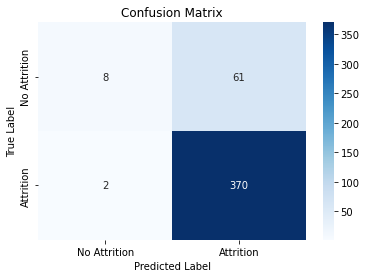

Confusion Matrix:
 [[  8  61]
 [  2 370]]


In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test data
y_pred = rfc.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", cm)


Given Attrition means Left, No Attrition means Stayed, 
Confusion matrix presents following results 
The number of Actual Left employees incorrectly predicted as Stayed = 2
The number of Actual Left employees correctly predicted as Left = 370
The number of Actual Stayed employees incorrectly predicted as Left = 61
The number of Actual Stayed employees correctly predicted as Stayed = 8


In [26]:
#from sklearn.metrics import classification_report

# Generate the classification report
#report = classification_report(y_test, y_pred)

# Print the classification report
#print(report)

## Threshold tuning to improve the Model 
The random forest classifier produces probability scores for each prediction, which can be used to set a threshold for predicting attrition. By adjusting the threshold, the trade-off between false positives and false negatives can be controlled.

Confusion matrix with optimal threshold:
 [[ 10  59]
 [  2 370]]


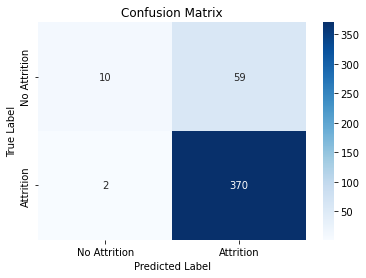

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import numpy as np

# Make predictions on test data
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Determine the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold that maximizes the F1 score
f1 = (2 * precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1)
optimal_threshold = thresholds[optimal_idx]

# Make predictions on test data using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate the model using the confusion matrix
confusion_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print('Confusion matrix with optimal threshold:\n', confusion_matrix_optimal)


# Plot the confusion matrix
sns.heatmap(confusion_matrix_optimal, annot=True, cmap="Blues", fmt="d", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Adjusting the Threshold

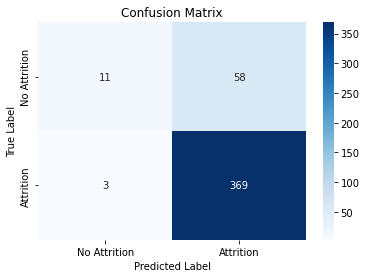

Confusion Matrix:
 [[ 11  58]
 [  3 369]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.16      0.27        69
           1       0.86      0.99      0.92       372

    accuracy                           0.86       441
   macro avg       0.82      0.58      0.59       441
weighted avg       0.85      0.86      0.82       441



In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import numpy as np

# Predict probabilities for test data
y_proba = rfc.predict_proba(X_test)[:, 1]

# Set a new threshold
new_threshold = 0.55

# Convert probabilities to predictions using new threshold
y_pred = (y_proba >= new_threshold).astype(int)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Overall, the best approach to improving the model's performance will depend on the specific data, problem, and resources available. A combination of these strategies may be necessary to achieve the best possible performance.
